In [53]:
using DrWatson
using DataFrames
using HDF5
using Statistics
using Plots

In [4]:
datapath = datadir("gene_expression", "2021-03-05")

"/Users/mr/Git/PWS/data/gene_expression/2021-03-05"

In [18]:
first_file = readdir(datapath)[1]

"Alg=smc_Duration=10_Smean=10_Xtimescale=0.1.hdf5"

In [44]:
f = h5open(joinpath(datapath, first_file))

🗂️ HDF5.File: (read-only) /Users/mr/Git/PWS/data/gene_expression/2021-03-05/Alg=smc_Duration=10_Smean=10_Xtimescale=0.1.hdf5
├─ 🏷️ algorithm
├─ 🏷️ corr_time_ratio
├─ 🏷️ corr_time_s
├─ 🏷️ duration
├─ 🏷️ gitcommit
├─ 🏷️ mean_s
├─ 🏷️ num_responses
├─ 🏷️ run_name
├─ 🏷️ script
├─ 🔢 DiscreteTimes
└─ 📂 Samples
   ├─ 🔢 MutualInformation
   ├─ 🔢 TimeConditional
   └─ 🔢 TimeMarginal

In [47]:
read(attributes(f)["corr_time_ratio"])

10

In [22]:
close(f)

In [50]:
sims = map(readdir(datapath)) do p
    (prefix, params, suffix) = parse_savename(p)
    h5open(joinpath(datapath, p)) do file
        mi = read(file["Samples/MutualInformation"])
        mi_mean = vec(mean(mi, dims=2))
        mi_var = vec(var(mi, dims=2) ./ size(mi, 2))
        dtimes = read(file["DiscreteTimes"])
        DataFrame(
            DiscreteTimes=dtimes,
            Mean=mi_mean,
            Var=mi_var,
            CorrTimeRatio=read(attributes(file)["corr_time_ratio"]),
            MeanS=read(attributes(file)["mean_s"])
        )
    end
end

sims = vcat(sims...)

,DiscreteTimes,Mean,Var,CorrTimeRatio,MeanS
,Float64,Float64,Float64,Int64,Int64
1,0.0,0.0,0.0,10,10
2,0.04,-0.00890742,5.72645e-6,10,10
3,0.08,0.0472454,7.88587e-6,10,10
4,0.12,0.188834,1.85791e-5,10,10
5,0.16,0.190238,3.60302e-5,10,10
6,0.2,0.212803,3.17512e-5,10,10
7,0.24,0.297418,4.00483e-5,10,10
8,0.28,0.405152,2.82667e-5,10,10
9,0.32,0.386625,9.00238e-5,10,10


g.CorrTimeRatio[1] = 10
g.CorrTimeRatio[1] = 5
g.CorrTimeRatio[1] = 2
g.CorrTimeRatio[1] = 10
g.CorrTimeRatio[1] = 5
g.CorrTimeRatio[1] = 2


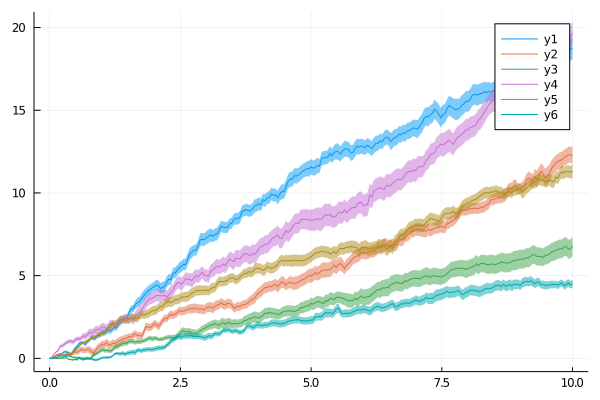

In [64]:
p = plot()
for g in groupby(sims, [:CorrTimeRatio, :MeanS])
    @show g.CorrTimeRatio[1]
    plot!(p, g.DiscreteTimes, g.Mean, ribbon=sqrt.(g.Var*100)) 
end
p